# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
modelar = pd.read_csv('Modelar_UH2019.txt', sep="|")
estimar = pd.read_csv('Estimar_UH2019.txt', sep="|")

print('Modelar:', modelar.shape, 'Estimar:', estimar.shape)

Modelar: (9958, 53) Estimar: (1104, 52)


In [3]:
modelar.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


In [4]:
for i in modelar.columns:
    a=True
    if i not in estimar.columns:
        a=False
        print(i)
        break

TARGET


In [5]:
missing_val_count=modelar.isnull().sum()

print(missing_val_count)

HY_id                                 0
HY_cod_postal                         0
HY_provincia                         42
HY_descripcion                     3942
HY_distribucion                    6745
HY_tipo                               0
HY_antiguedad                      5484
HY_metros_utiles                   2886
HY_metros_totales                    34
HY_num_banos                          0
HY_cert_energ                      8300
HY_num_terrazas                       0
HY_ascensor                           0
HY_trastero                           0
HY_num_garajes                        0
HY_precio                             0
HY_precio_anterior                 3158
IDEA_area                          2631
IDEA_poblacion                     2635
IDEA_densidad                      2635
IDEA_pc_1960                       2710
IDEA_pc_1960_69                    2710
IDEA_pc_1970_79                    2710
IDEA_pc_1980_89                    2710
IDEA_pc_1990_99                    2710


In [13]:
modelar['HY_provincia'].value_counts()

Valencia       2080
Almería        1768
Murcia         1516
Castellón      1347
Alicante        794
Málaga          534
Granada         384
Valladolid      300
Tarragona       293
Barcelona       161
Las Palmas      122
Madrid           77
Cádiz            74
Baleares         73
Albacete         45
La Rioja         45
Gerona           38
Soria            34
Córdoba          32
Teruel           22
Cuenca           21
Palencia         19
Guadalajara      19
León             18
Toledo           17
A Coruña         16
Sevilla          11
Huelva           10
Zaragoza          9
Avila             9
Ciudad Real       5
Lérida            5
Pontevedra        5
Huesca            3
Tenerife          2
Burgos            2
Cáceres           1
Segovia           1
Navarra           1
Asturias          1
Badajoz           1
Jaén              1
Name: HY_provincia, dtype: int64

In [24]:
modelar[['HY_provincia', 'TARGET']].groupby(by = 'HY_provincia').mean()

,TARGET
HY_provincia,
A Coruña,58.505625
Albacete,94.687778
Alicante,80.342972
Almería,71.551012
Asturias,62.950000
Avila,70.886667
Badajoz,96.610000
Baleares,65.949178
Barcelona,81.296025


C:\Users\ruttamchandani\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


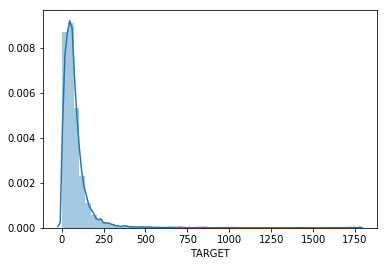

In [6]:
sns.distplot(modelar.TARGET);

In [7]:
modelar.TARGET.describe()

count    9958.000000
mean       74.155855
std        89.738992
min         0.000000
25%        28.655000
50%        56.275000
75%        90.507500
max      1770.000000
Name: TARGET, dtype: float64

In [30]:
modelar = modelar.loc[modelar['TARGET']<300,]

In [31]:
modelar.to_csv('./modelar_normalized.csv', index = False)

# Testing: Mutual information vs. correlation:

In [8]:
d = {'col1': [1,0,1,0,1,0,1,0,1], 'col2': [0,0,0,0,1,1,1,1,1],'Target': [1,1,1,1,0,0,0,0,0]}
df = pd.DataFrame(data=d)
df

,col1,col2,Target
0,1,0,1
1,0,0,1
2,1,0,1
3,0,0,1
4,1,1,0
5,0,1,0
6,1,1,0
7,0,1,0
8,1,1,0


In [42]:
import numpy as np

#Mutual information definition as seen in Info. theory
def MI(X,Y,bins):
   p_XY = np.histogram2d(X,Y,bins)[0]
   p_X = np.histogram(X,bins)[0]
   p_Y = np.histogram(Y,bins)[0]

   H_X = entropy(p_X)
   H_Y = entropy(p_Y)
   H_XY = entropy(p_XY)

   MI = H_X + H_Y - H_XY
   return MI

#Shannon's entropy definition:
def entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

def MI_matrix(A,bins):
    try: 
        A=A.values
        print(A)
    except:
        A=A
    n=A.shape[1]
    matMI = np.zeros((n, n))
    for ix in np.arange(n):
        for jx in np.arange(ix+1,n):
            matMI[ix,jx] = MI(A[:,ix], A[:,jx], bins)
    cmap = sns.diverging_palette(255, 220, as_cmap=True)
    sns.heatmap(matMI.transpose(), cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return matMI

#Test. Be careful with unbalanced classes. 
A = np.array([[ 1,  0,  1, 1, 0  ],
              [ 1,  1, 0, 1 , 0 ],
              [ 0,  1,  1, 0, 1 ],
              [0,  1,  1, 0, 1 ],
             [0,  2,  5, 0, 3 ]])

In [52]:
A_df=pd.DataFrame(A)
A_df.corr()

,0,1,2,3,4
0,1.000000,-0.645497,-0.515122,1.000000,-0.745356
1,-0.645497,1.000000,0.725476,-0.645497,0.866025
2,-0.515122,0.725476,1.000000,-0.515122,0.942421
3,1.000000,-0.645497,-0.515122,1.000000,-0.745356
4,-0.745356,0.866025,0.942421,-0.745356,1.000000


,0,1,2,3,4
0,1.000000,-0.645497,-0.515122,1.000000,-0.745356
1,-0.645497,1.000000,0.725476,-0.645497,0.866025
2,-0.515122,0.725476,1.000000,-0.515122,0.942421
3,1.000000,-0.645497,-0.515122,1.000000,-0.745356
4,-0.745356,0.866025,0.942421,-0.745356,1.000000


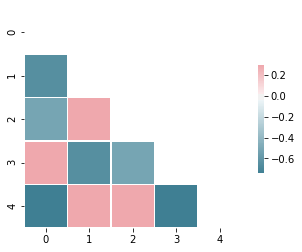

In [53]:
def Corr_Matrix(dataframe):
    a=dataframe.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(a, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(a, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return a
Corr_Matrix(A_df)

array([[0.        , 0.41997309, 0.41997309, 0.97095059, 0.97095059],
       [0.        , 0.        , 0.81997309, 0.41997309, 0.97095059],
       [0.        , 0.        , 0.        , 0.41997309, 0.97095059],
       [0.        , 0.        , 0.        , 0.        , 0.97095059],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

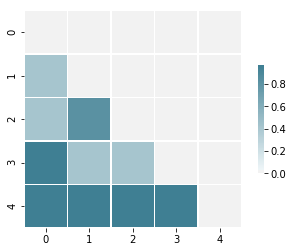

In [71]:
MI_matrix(A,bins=10)

In [92]:
test=modelar[['HY_num_banos','TARGET']]
test.head()

,HY_num_banos,TARGET
0,0,32.16
1,2,30.71
2,1,63.48
3,0,108.27
4,0,7.50


In [93]:
from sklearn import feature_selection as fss

fss.mutual_info_regression(modelar,modelar.TARGET)




ValueError: could not convert string to float: 'Granada'

# Test MI vs F-test:

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html

In [48]:
modelar['HY_descripcion'].count()

5921

In [49]:
estimar['HY_descripcion'].count()

659

In [50]:
estimar.shape

(1104, 52)

## EDA (Exploratory Data Analysis)

In [95]:
from sklearn.model_selection import train_test_split

In [98]:
modelar = pd.read_csv('modelar_normalized.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D633BA8E48>,
      dtype=object)

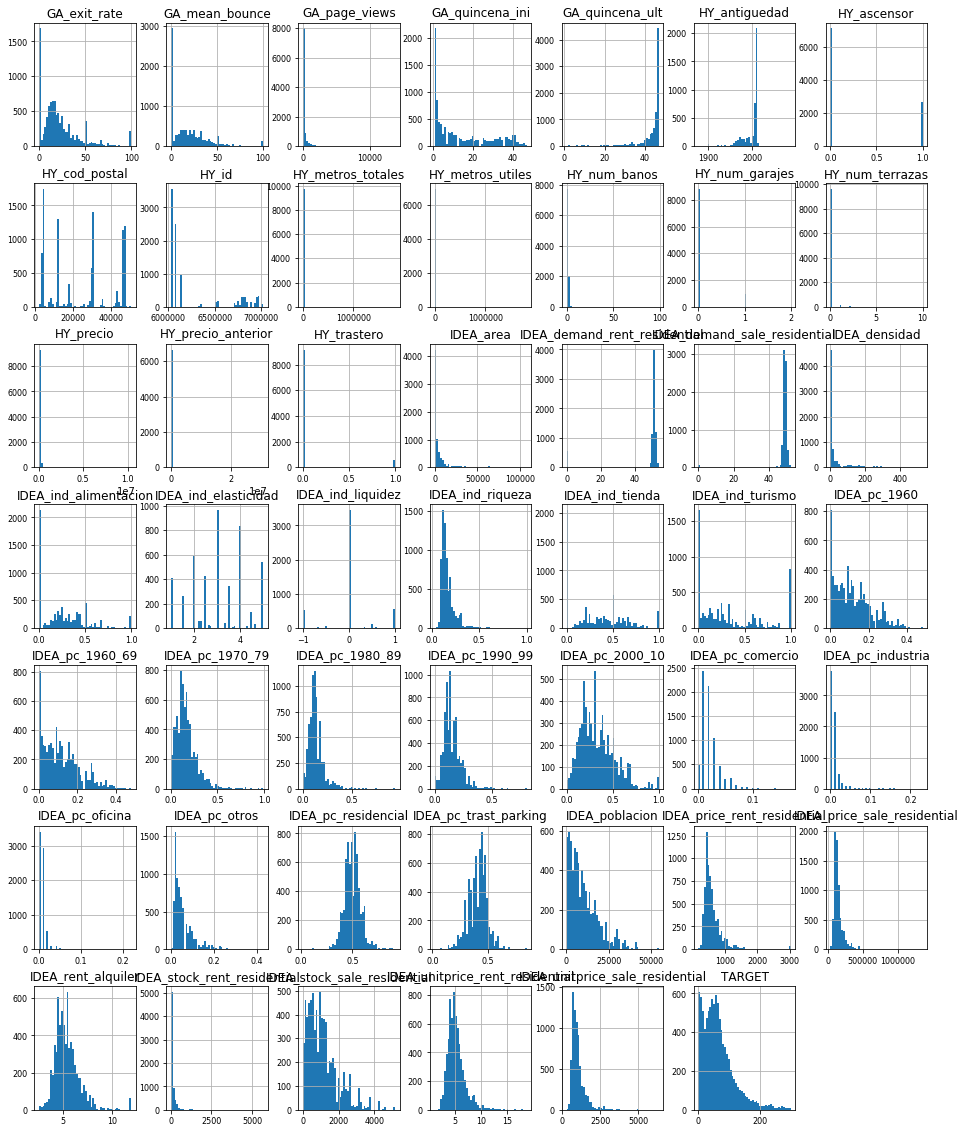

In [4]:
modelar.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

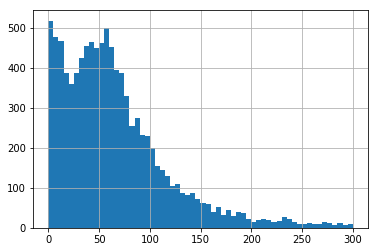

In [4]:
modelar['TARGET'].hist(bins = 60)

In [21]:
modelar.loc[modelar['HY_metros_totales']>10000].head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
1395,6035128,12006,Castellón,Parcela de tipo suelo urbano de forma irregula...,NaN,Solar,NaN,NaN,99999.0,0,...,4.71,633.69,78.0,52.10,689,30.35,23.28,1,47,188.14
2922,6042341,4117,Almería,"Parcela de terreno edificable, ubicada en el m...",NaN,Solar,NaN,NaN,14556.0,0,...,4.58,372.50,9.0,51.01,323,31.13,26.11,1,46,108.92
2923,6042342,4117,Almería,"Parcela de terreno edificable, ubicada en el m...",NaN,Solar,NaN,NaN,12976.0,0,...,9.88,1414.29,15.0,50.25,33,0.00,4.29,1,44,156.05
3617,6079546,46901,Valencia,Suelo rústico de uso agrario situado en el Pol...,NaN,Solar,NaN,NaN,108849.0,0,...,6.04,1251.80,120.0,50.64,541,41.19,27.86,1,47,107.68
3824,6082833,30880,Murcia,"Suelo Rústico compuesto de dos parcelas, situa...",NaN,Solar,NaN,NaN,57995.0,0,...,7.75,1050.00,6.0,50.00,804,35.78,22.78,1,46,137.95


In [20]:
modelar[['GA_quincena_ini', 'GA_quincena_ult']].head()

,GA_quincena_ini,GA_quincena_ult
0,2,46
1,1,47
2,1,47
3,2,47
4,2,39


In [19]:
modelar.loc[modelar['HY_precio']>2000000]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
4429,6037826,8202,Barcelona,Local comercial en esquina integrado en dos ed...,"Cuenta con una superficie total de 1076, 64 m²...",Local,1960.0,NaN,2118.53,0,...,7.29,1030.00,174.0,52.45,153,50.31,50.87,11,47,145.57
4437,6038463,4001,Almería,NaN,NaN,Local,NaN,0.0,385.07,0,...,NaN,NaN,NaN,NaN,99,30.00,22.20,39,47,50.10
4543,6075912,29730,Málaga,NaN,NaN,Solar,NaN,0.0,10000.00,0,...,NaN,NaN,NaN,NaN,15,45.83,51.19,33,45,88.42
6344,6033399,4630,Almería,Terrenos urbanos en el Paraje La Espesura. Tie...,Terreno de superficie registral: 269.116 m².\r...,Solar,NaN,NaN,269116.00,0,...,4.54,444.62,54.0,51.70,426,22.22,17.42,1,47,97.46
8566,6811795,4007,Almería,NaN,NaN,Local,NaN,2200.0,2300.50,0,...,NaN,NaN,NaN,NaN,15,66.67,78.33,30,46,46.71
9124,6940987,46980,Valencia,NaN,NaN,Solar,NaN,2538.0,2538.00,0,...,4.29,451.88,72.0,51.84,29,16.67,24.17,38,47,38.72
9219,6946638,12520,Castellón,NaN,NaN,Solar,NaN,4226.0,4226.00,0,...,3.97,524.14,75.0,51.68,10,33.33,33.33,35,46,170.18
9711,7008680,50270,Zaragoza,NaN,NaN,Solar,NaN,1820000.0,1820000.00,0,...,3.98,331.08,9.0,51.10,27,22.50,13.89,39,42,166.80


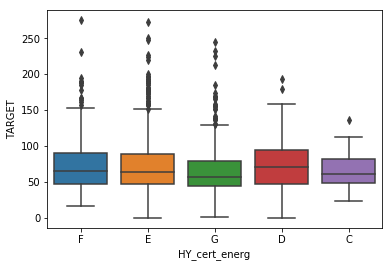

In [35]:
sns.boxplot(data = modelar[['HY_cert_energ', 'TARGET']], x = 'HY_cert_energ', y = 'TARGET')

#### Certificado energético

In [32]:
modelar['HY_cert_energ'].unique()

array([nan, 'F', 'E', 'G', 'D', 'C'], dtype=object)

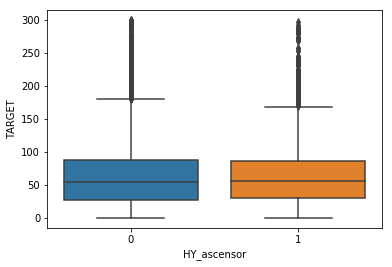

In [37]:
sns.boxplot(data = modelar[['HY_ascensor', 'TARGET']], x = 'HY_ascensor', y = 'TARGET')

#### Poblacion, densidad

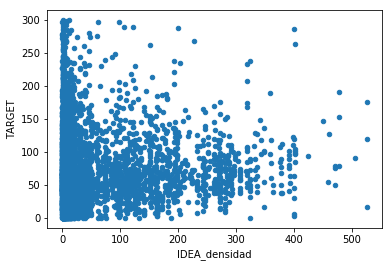

In [41]:
modelar[['IDEA_densidad', 'TARGET']].plot(x = 'IDEA_densidad', y = 'TARGET', kind = 'scatter')

In [59]:
from sklearn.feature_selection import mutual_info_classif as MIc
from sklearn.feature_selection import mutual_info_regression as MIr

In [54]:
modelar['IDEA_densidad'].dtype=='float64'

True

In [68]:
def MI(dataX,y):

In [67]:
MI(modelar[['IDEA_densidad', 'TARGET']], modelar['TARGET'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [77]:
modelar['GA_'].map(str.l)

AttributeError: type object 'str' has no attribute 'len'

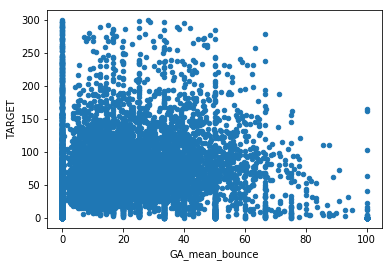

In [81]:
modelar[['GA_mean_bounce', 'TARGET']].plot(x = 'GA_mean_bounce',y = 'TARGET',kind = 'scatter')

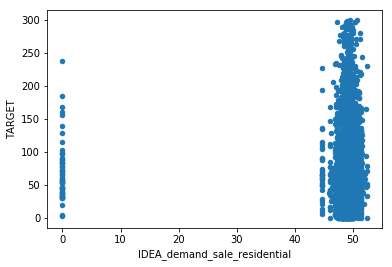

In [82]:
modelar[['IDEA_demand_sale_residential', 'TARGET']].plot(x = 'IDEA_demand_sale_residential',y = 'TARGET',kind = 'scatter')

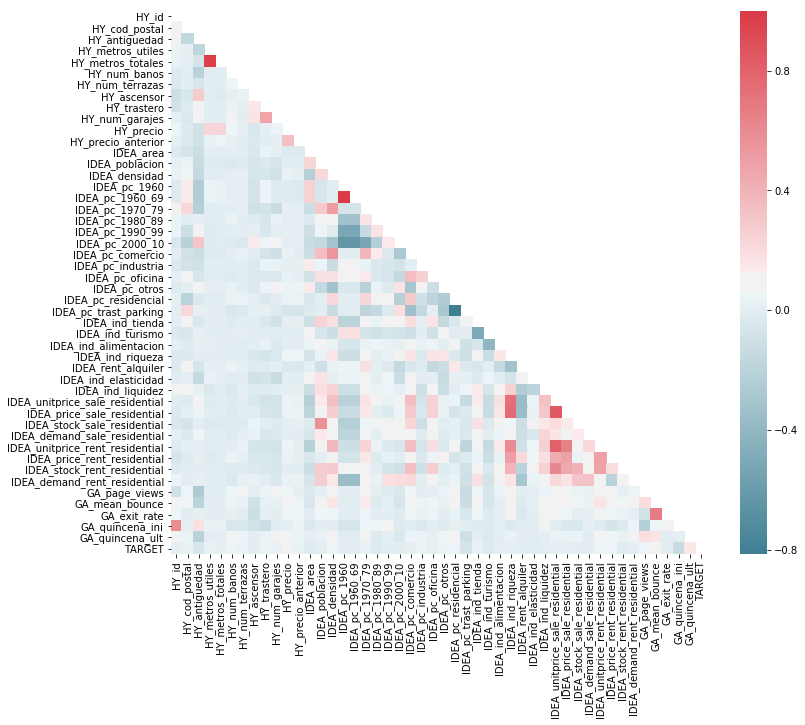

In [91]:
fig, ax = plt.subplots(figsize = (12, 10))
corr_matrix = modelar.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, cmap = sns.diverging_palette(220, 10, as_cmap = True), mask = mask)

In [100]:
y = modelar['TARGET']
X = modelar.drop('TARGET', axis = 1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
from sklearn.metrics import mean_absolute_error

In [94]:
rf_model = RandomForestRegressor(random_state=1)

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
val_